# Google Play and Apple iOS App Recommendations

### Scenario:

We're data analysts for an app development company in the United States. Over the last five years we have established a respectably sized customer based, but there are still opportunities to grow our customer base and increase revenue. We want to develop a new app that is a stand-alone free version that our customers will enjoy. To generate revenue, we may employ in-app purchases or a subscription-based model. 

For reference the six most used app monetization strategies (for free apps) are:

* App advertising
* In-app purchases
* Subscriptions
* Selling merchandise
* Sponsorships
* Collecting and selling data
   
To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Since we want to develop a new app for Google Play and iOS, the app profiles we pick need to be successful for both markets.

## Method
Before we do any visualization or making and recommendations, we first need to do the following:
* Load in the datasets
* Clean data
* Exploratory Data Analysis

## Recommendations
To make sound business decisions we need to perform a few tasks during analysis:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.style as style
#pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [2]:
csv = pd.read_csv("google_apps_cleaned.csv")
csv.head()

apple_csv = pd.read_csv("apple_apps_cleaned.csv")

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

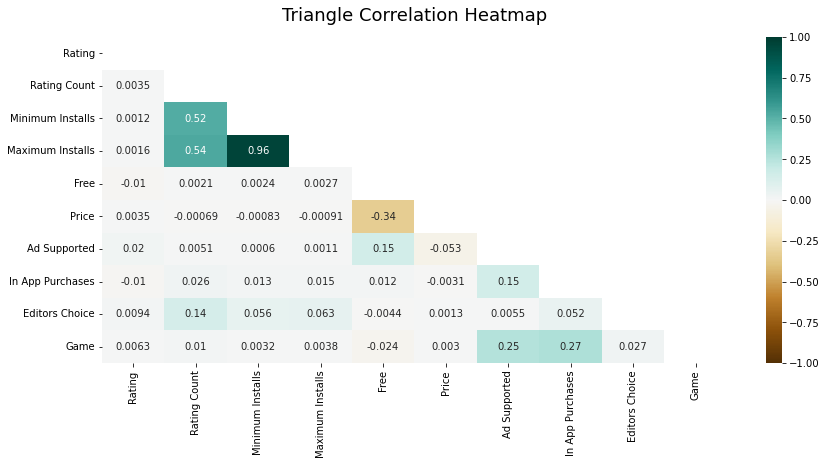

In [3]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(csv.corr(), dtype=bool))
heatmap = sns.heatmap(csv.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### Column information
The cleaned dataset does not contain missing data, and I removed several irrelevant columns that would not help our analysis.
A complete look at the data cleaning process can be found within the attached notebook file: `google_play_eda.ipynb`.

The original dataset contained over 2 million rows of data, which is about how many apps exist on the google play store currently. I removed any observations that included apps named in foreign languages, especially non-latin characters. To implement this task we can use the python method `.isascii()` in conjunction with a lambda function to iterate over all rows in a certain column. 

For further reading on the American Standard Code for Information Interchange: *https://en.wikipedia.org/wiki/ASCII*

As mentioned in the introduction, the fictional app developer is a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove any instances of such apps.

I filtered out any observations with 0 user installations (the number of times the app had been downloaded and installed) and 0 reviews. If the app had not been downloaded nor reviewed, it is not worth having unused applications that may skew the analysis. 

After data cleaning had ben performed the original dataset had been reduced to only 40% of its original size, but I would consider 946,795 observations to be more than enough for a representative dataset.

In [4]:
csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining Google dataset length after data cleaning:",\
round(csv.shape[0] / 2312944 * 100, 2),"%") # 2,312,944 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946795 entries, 0 to 946794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          946795 non-null  object 
 1   Category          946795 non-null  object 
 2   Rating            946795 non-null  float64
 3   Rating Count      946795 non-null  float64
 4   Installs          946795 non-null  object 
 5   Minimum Installs  946795 non-null  float64
 6   Maximum Installs  946795 non-null  int64  
 7   Free              946795 non-null  bool   
 8   Price             946795 non-null  float64
 9   Currency          946783 non-null  object 
 10  Developer Id      946795 non-null  object 
 11  Released          928637 non-null  object 
 12  Last Updated      946795 non-null  object 
 13  Content Rating    946795 non-null  object 
 14  Ad Supported      946795 non-null  bool   
 15  In App Purchases  946795 non-null  bool   
 16  Editors Choice    94

In [5]:
apple_csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining Apple dataset length after data cleaning:",\
round(apple_csv.shape[0] / 1230376 * 100, 2),"%") # 1,230,376 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510475 entries, 0 to 510474
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   App_Name             510475 non-null  object 
 1   Primary_Genre        510475 non-null  object 
 2   Content_Rating       510475 non-null  object 
 3   Released             510475 non-null  object 
 4   Updated              510475 non-null  object 
 5   Version              510475 non-null  object 
 6   Price                510475 non-null  float64
 7   Currency             510475 non-null  object 
 8   Free                 510475 non-null  bool   
 9   Developer            510475 non-null  object 
 10  Average_User_Rating  510475 non-null  float64
 11  Reviews              510475 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 285.2 MB


Remaining Apple dataset length after data cleaning: 41.49 %


### Category overview

In [6]:
# Frequency of app categories
category_frequency = round(csv["Category"].value_counts(normalize = True) * 100, 2)

# Convert value counts series to pandas dataframe
category_frequency = pd.Series.to_frame(category_frequency).reset_index()

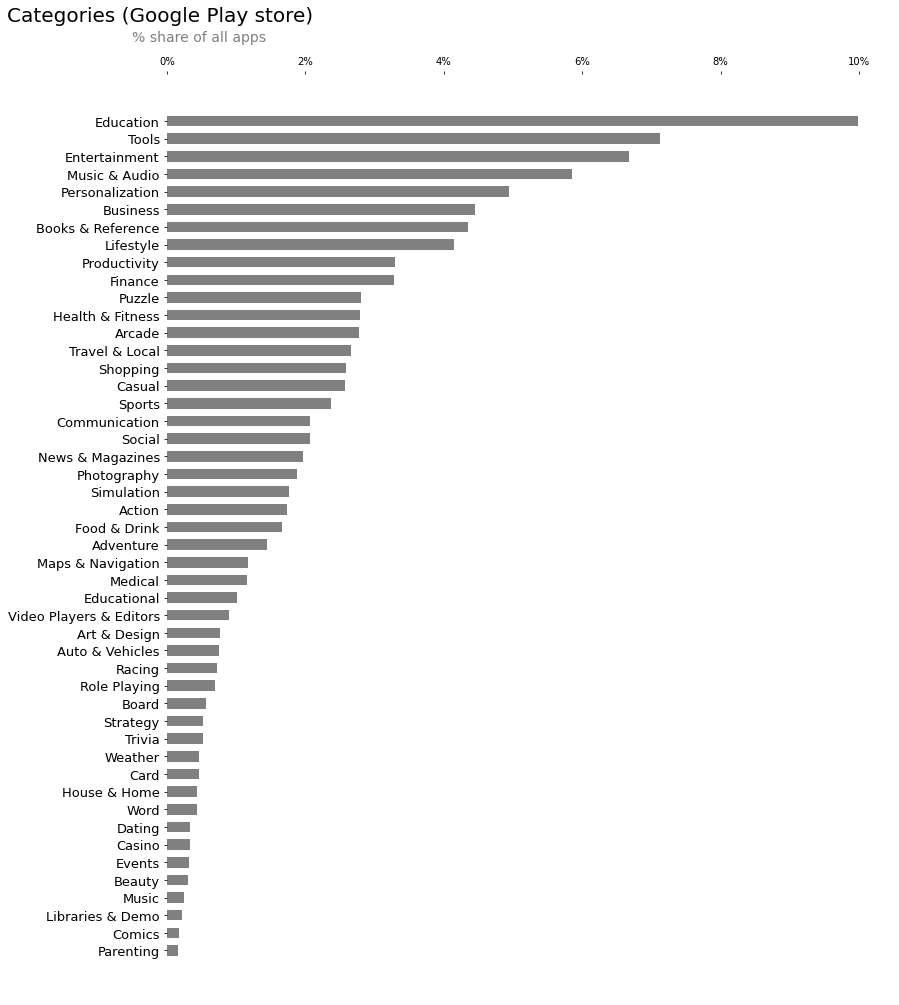

In [7]:
category_frequency = category_frequency.rename(columns = {"index": "App_Category", "Category":"Percentage"})
#4B86C1

fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(category_frequency["App_Category"], category_frequency["Percentage"], color = "grey", height = 0.6)
plt.gca().invert_yaxis()
plt.title("Categories (Google Play store)", size = 20, loc = "left", x = -0.22, y = 1.05)
plt.text(-.5, -4.5,"% share of all apps", size = 14, color = "grey")

plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
#plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)
# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

In [8]:
apple_categories =  round(apple_csv["Primary_Genre"].value_counts(normalize = True) * 100, 2)
apple_categories = pd.Series.to_frame(apple_categories).reset_index()

apple_categories = apple_categories.rename(columns = {"index": "Category", "Primary_Genre":"Percentage"})


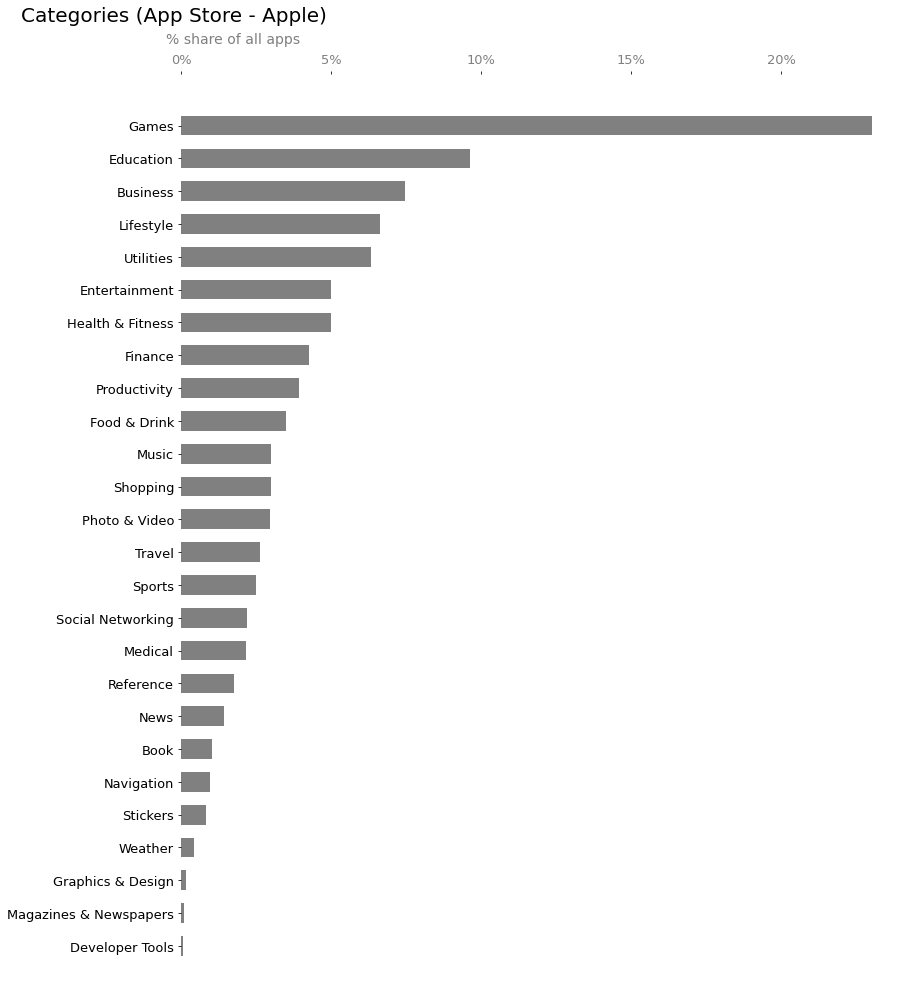

In [83]:
fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(apple_categories["Category"], apple_categories["Percentage"], color = "grey", height = 0.6)
plt.gca().invert_yaxis()
plt.title("Categories (App Store - Apple)", size = 20, loc = "left", x = -0.22, y = 1.05)
plt.text(-.5, -2.5,"% share of all apps", size = 14, color = "grey")

plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)
# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

In [10]:
# Category rating average
categories_grouped = csv.groupby("Category")
print("The average Google app rating is:", round(csv["Rating"].mean(), 2), "out of 5")
print("\n")
print(round(categories_grouped["Rating"].mean().sort_values(ascending = False), 2))

The average Google app rating is: 4.09 out of 5


Category
Events                     4.29
Arcade                     4.26
Personalization            4.25
Music & Audio              4.25
Word                       4.25
Books & Reference          4.24
Puzzle                     4.24
Education                  4.21
Shopping                   4.21
Social                     4.19
Food & Drink               4.14
News & Magazines           4.14
Casino                     4.14
Educational                4.13
Casual                     4.12
Trivia                     4.12
Weather                    4.11
Lifestyle                  4.10
Board                      4.08
Communication              4.08
Adventure                  4.07
Libraries & Demo           4.07
Business                   4.06
Medical                    4.05
Sports                     4.05
Travel & Local             4.04
Beauty                     4.03
Card                       4.03
Productivity               4.02
Health & Fitn

In [11]:
apple_categories_grouped = apple_csv.groupby("Primary_Genre")
print("The average Apple app rating is:", round(apple_csv["Average_User_Rating"].mean(), 2), "out of 5")
print("\n")
print(round(apple_categories_grouped["Average_User_Rating"].mean().sort_values(ascending = False), 2))

The average Apple app rating is: 4.03 out of 5


Primary_Genre
Shopping                  4.44
Graphics & Design         4.31
Food & Drink              4.29
Developer Tools           4.28
Lifestyle                 4.21
Social Networking         4.18
Health & Fitness          4.18
Magazines & Newspapers    4.15
Business                  4.12
Stickers                  4.11
Music                     4.11
Book                      4.08
Finance                   4.08
Sports                    4.08
News                      4.08
Reference                 4.04
Medical                   4.04
Education                 3.99
Games                     3.99
Productivity              3.96
Entertainment             3.91
Travel                    3.90
Weather                   3.88
Utilities                 3.75
Photo & Video             3.69
Navigation                3.60
Name: Average_User_Rating, dtype: float64


In [12]:
# Difference between maximum rating and average rating
def dif(group):
    return (group.max() - group.mean())

In [13]:
# Google categories difference in rating
category_group = csv.groupby("Category")
round(category_group["Rating"].agg(dif).sort_values(ascending=False), 2)


Category
House & Home               1.20
Video Players & Editors    1.20
Simulation                 1.20
Dating                     1.18
Photography                1.12
Music                      1.11
Auto & Vehicles            1.10
Tools                      1.10
Maps & Navigation          1.09
Comics                     1.07
Parenting                  1.03
Art & Design               1.02
Role Playing               1.02
Racing                     1.01
Strategy                   1.01
Entertainment              1.00
Action                     0.99
Finance                    0.99
Health & Fitness           0.99
Productivity               0.98
Card                       0.97
Beauty                     0.97
Travel & Local             0.96
Sports                     0.95
Medical                    0.95
Business                   0.94
Libraries & Demo           0.93
Adventure                  0.93
Communication              0.92
Board                      0.92
Lifestyle                  0.90

In [14]:
category_pivot_table = csv.pivot_table(index = "Category", aggfunc = {"Category" : "count", "Rating" : "mean"})
category_pivot_table = category_pivot_table.rename(columns={"Category":"Total_Count", "Rating":"Average_Rating"})
category_pivot_table = category_pivot_table.sort_values(by = "Average_Rating", ascending = False)

In [15]:
category_pivot_table

,Total_Count,Average_Rating
Category,,
Events,3046,4.291924
Arcade,26280,4.256610
Personalization,46807,4.253080
Music & Audio,55489,4.253079
Word,4057,4.245280
Books & Reference,41165,4.235780
Puzzle,26587,4.235668
Education,94478,4.213701
Shopping,24475,4.209544


In [71]:
ratings_above_average = category_pivot_table[category_pivot_table["Average_Rating"] > csv["Rating"].mean()]
ratings_above_average = ratings_above_average.index.tolist()

ratings_below_average = category_pivot_table[category_pivot_table["Average_Rating"] < csv["Rating"].mean()]
ratings_below_average = ratings_below_average.index.tolist()


In [89]:
len(ratings_below_average)

30

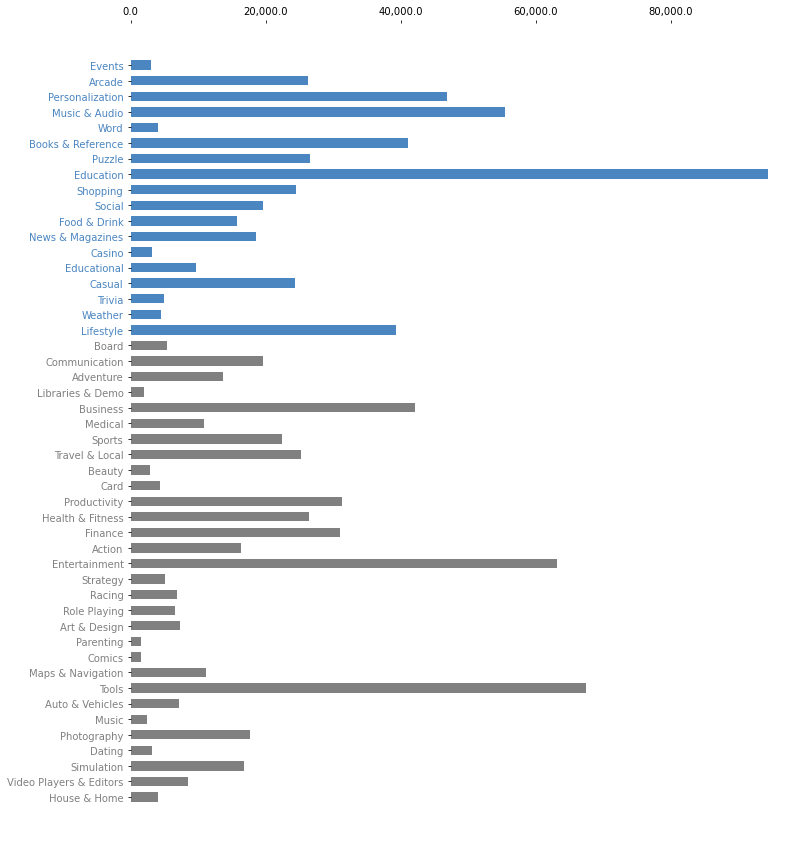

[Text(0, 18, 'Board'), Text(0, 19, 'Communication'), Text(0, 20, 'Adventure'), Text(0, 21, 'Libraries & Demo'), Text(0, 22, 'Business'), Text(0, 23, 'Medical'), Text(0, 24, 'Sports'), Text(0, 25, 'Travel & Local'), Text(0, 26, 'Beauty'), Text(0, 27, 'Card'), Text(0, 28, 'Productivity'), Text(0, 29, 'Health & Fitness'), Text(0, 30, 'Finance'), Text(0, 31, 'Action'), Text(0, 32, 'Entertainment'), Text(0, 33, 'Strategy'), Text(0, 34, 'Racing'), Text(0, 35, 'Role Playing'), Text(0, 36, 'Art & Design'), Text(0, 37, 'Parenting'), Text(0, 38, 'Comics'), Text(0, 39, 'Maps & Navigation'), Text(0, 40, 'Tools'), Text(0, 41, 'Auto & Vehicles'), Text(0, 42, 'Music'), Text(0, 43, 'Photography'), Text(0, 44, 'Dating'), Text(0, 45, 'Simulation'), Text(0, 46, 'Video Players & Editors'), Text(0, 47, 'House & Home')]


In [90]:
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

colors = []

for i in ratings_above_average:
    colors.append("#4B86C1")
else:
    for j in ratings_below_average:
        colors.append("grey")

fig, ax = plt.subplots(figsize=(12, 15))
plt.barh(category_pivot_table.index, category_pivot_table["Total_Count"], color = colors, height = 0.6)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.gca().invert_yaxis()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()

plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)

colors_yticks = ["#4B86C1"] * 18
colors_yticks

colors_yticks_2 = ["grey"] * 30
colors_yticks_2


labels = ax.get_yticklabels()

for l, c in zip(labels, colors_yticks):
    l.set_color(c)

more_labels = ax.get_yticklabels()[18:]

for l, c in zip(more_labels, colors_yticks_2):
    l.set_color(c)
#for i in ratings_above_average:
   # plt.gca().get_yticklabels().set_color("maroon")
plt.show()
#4B86C1
print(more_labels)

['#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1',
 '#4B86C1']

### Google Play app installs/downloads

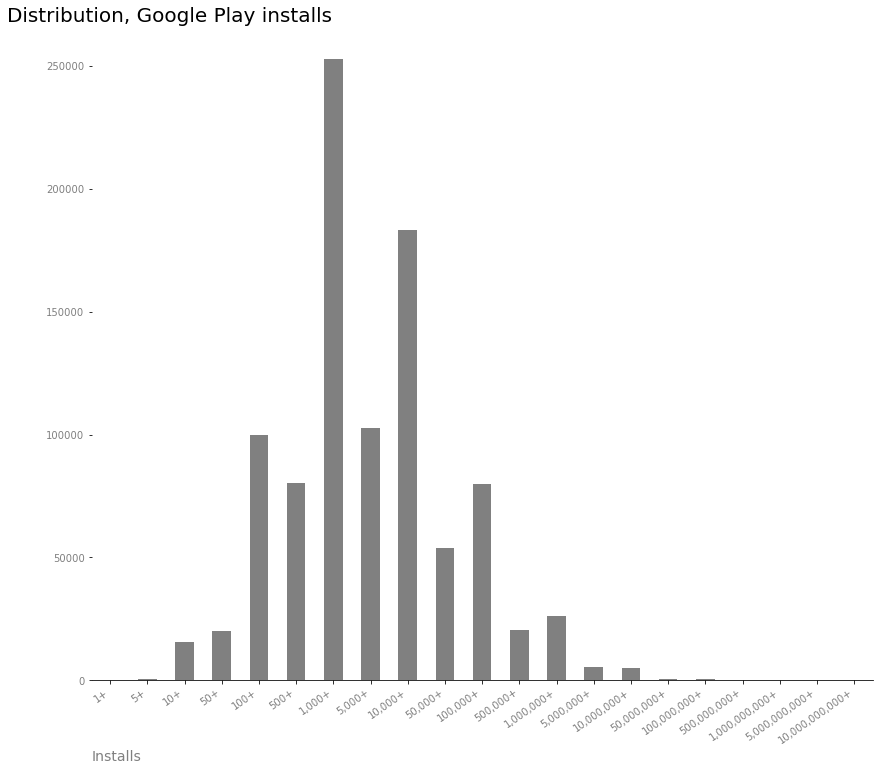

In [17]:
series = csv["Installs"]\
.value_counts().iloc[[16, 15, 10, 9, 3, 4, 0, 2, 1, 6, 5, 8, 7, 11, 12, 13, 14, 17, 18, 19, 20]]
#14
series.plot.bar(figsize = (14, 12), color = "grey")
plt.title("Distribution, Google Play installs", x = 0.1, size = 20)
plt.gca().spines[["right", "left", "top"]].set_visible(False)
plt.xticks(color = "grey", rotation = 35, ha = "right")
plt.yticks(color = "grey")
plt.xlabel("Installs", color = "grey", size = 14, loc = "left")
plt.show()

### Apps with over 1 billion downloads
Google Play Services is the only app on the google play store that has over 10 billion downloads. This app is installed by default on android devices, and is a critical component that enables google to authenticate services to the user. If this app is uninstalled, other apps may not work.

Google apps that have the most downloads include WhatsApp, YouTube, Google Drive, Gmail, Facebook, Netflix, TikTok, Candy Crush Saga, Instagram, Skype, Snapchat, and a host of other well-known applications.

In [18]:
csv[csv["Installs"] == "10,000,000,000+"]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
884457,Google Play services,Tools,4.2,35128398.0,"10,000,000,000+",1.000000e+10,12057627016,True,0.0,USD,Google LLC,2012-05-24,2021-06-10,Everyone,False,False,False,False


In [19]:
# List of apps with over 5 billion downloads
csv[csv["Installs"] =="5,000,000,000+"]["App Name"].unique().tolist()

['Google TV (previously Play Movies & TV)',
 'WhatsApp Messenger',
 'YouTube',
 'Google Drive',
 'Hangouts',
 'Google Chrome: Fast & Secure',
 'Google Text-to-Speech',
 'Google Maps - Navigate & Explore',
 'Google',
 'Google Photos',
 'Android Accessibility Suite',
 'Gmail',
 'Facebook']

In [20]:
# List of apps with over 1 billion downloads
csv[csv["Installs"] =="1,000,000,000+"]["App Name"].unique().tolist()

['Samsung Email',
 'Netflix',
 'Samsung Gallery',
 'TikTok',
 'Dropbox: Cloud Storage, Photo Backup, File Manager',
 'Samsung Health',
 'Google Calendar',
 'Candy Crush Saga',
 'Instagram',
 'Samsung Experience Service',
 'Skype - free IM & video calls',
 'Briefing',
 'Google Play Books - Ebooks, Audiobooks, and Comics',
 'Google Street View',
 'ANT Radio Service',
 'SHAREit - Transfer & Share',
 'Carrier Services',
 'Google Play Services for AR',
 'Subway Surfers',
 'Spotify: Listen to podcasts & find music you love',
 'ANT+ Plugins Service',
 'Samsung My Files',
 'Currents',
 'Google News - Top world & local news headlines',
 'Samsung Calculator',
 'Samsung Security Policy Update',
 'Samsung Voice Recorder',
 'Samsung Push Service',
 'Microsoft PowerPoint: Slideshows and Presentations',
 'Gboard - the Google Keyboard',
 'Android System WebView',
 'Samsung One UI Home',
 'Microsoft Excel: View, Edit, & Create Spreadsheets',
 'Google Translate',
 'Google Play Games',
 'Snapchat',
 'Sam

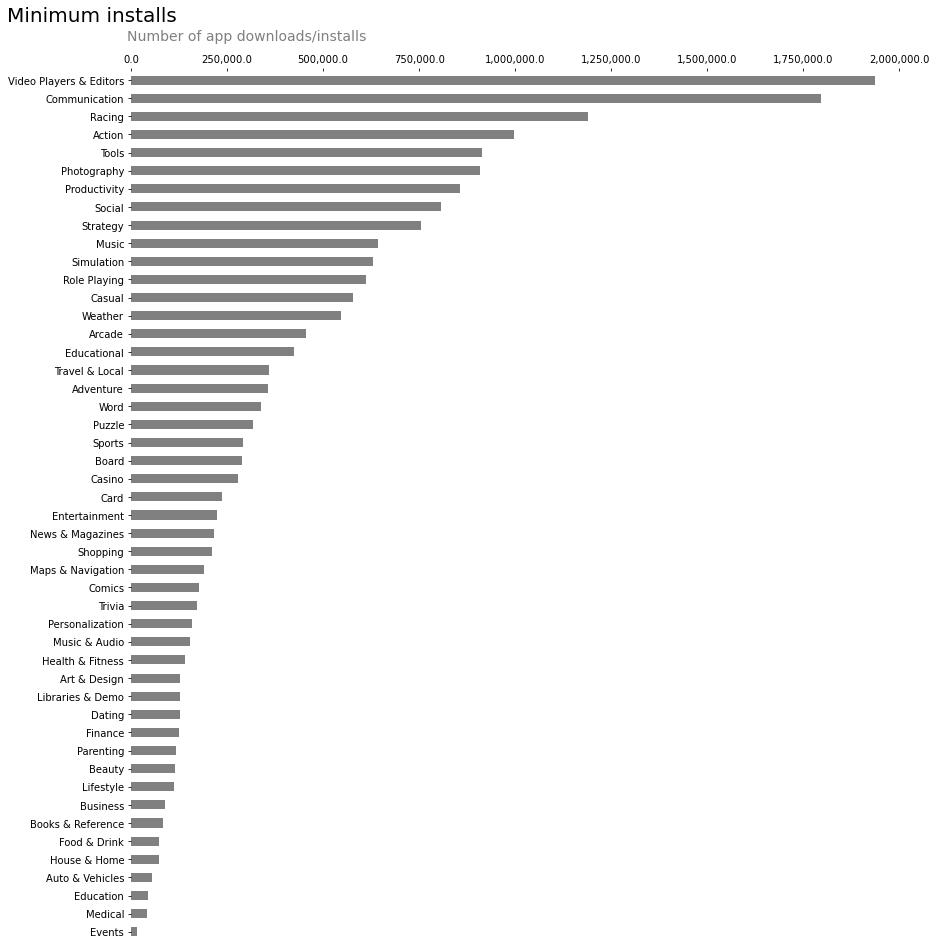

In [21]:
# Categories with highest minimum installs, average
fig, ax = plt.subplots(figsize = (14, 16))
categories_grouped["Minimum Installs"].mean().sort_values(ascending = True).plot.barh(color = "grey")
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Minimum installs", size = 20, x = -0.05, y= 1.05)
plt.ylabel("")
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax.xaxis.tick_top()
plt.text(-10000, 49.2, "Number of app downloads/installs", size = 14, color = "grey")
plt.show()

### Data Exploration

We have dealt with missing data, but this dataset has roughly 1000 rows that are duplicate entries of the same app. In addition, we noticed apps with non-English character usage and text characters that are not in Standard American Code (ASCII)

*https://en.wikipedia.org/wiki/ASCII*

As mentioned in our introduction, we are a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove any instances of such apps.

We know that our datasets contain duplicates and foreign-language characters when we previewed the data on kaggle.com.

The google play dataset has more occurrences of duplicated apps, whereas the apple store dataset has less than 10.
